In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv("C:/Users/lenovo/Documents/dataset/weather_disease_cleaned-1.csv")
print("Dataset shape:", df.shape)
print(df.head())

Dataset shape: (4981, 52)
   Age  Gender  Temperature (C)  Humidity  Wind Speed (km/h)  nausea  \
0    4       1           25.826  0.740000           8.289000       1   
1   55       0           21.628  0.600000          15.236000       0   
2   45       0           13.800  0.817083           4.291992       0   
3    6       0           37.254  0.610000          18.009000       1   
4   70       0           18.162  0.870000          17.916000       0   

   joint_pain  abdominal_pain  high_fever  chills  ...  shortness_of_breath  \
0           0               0           0       0  ...                    1   
1           0               0           0       1  ...                    0   
2           0               0           0       0  ...                    0   
3           0               0           1       0  ...                    0   
4           0               0           0       0  ...                    0   

   reduced_smell_and_taste  skin_irritation  itchiness  throbbing_

In [3]:
TARGET = "prognosis_3class"
X = df.drop(columns=[TARGET])
y = df[TARGET]

In [4]:
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

In [5]:
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42
)

In [6]:
print("Train shape:", X_train.shape)
print("Validation shape:", X_val.shape)
print("Test shape:", X_test.shape)

Train shape: (3486, 51)
Validation shape: (747, 51)
Test shape: (748, 51)


In [7]:
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_val_enc = le.transform(y_val)
y_test_enc = le.transform(y_test)

class_names = list(le.classes_)
class_to_id = {c: i for i, c in enumerate(class_names)}
id_to_class = {i: c for i, c in enumerate(class_names)}

print("Classes:", class_names)
print("Mapping:", class_to_id)

Classes: ['Heart Attack', 'Migraine', 'Other']
Mapping: {'Heart Attack': 0, 'Migraine': 1, 'Other': 2}


In [8]:
X_train["prognosis_encoded"] = y_train_enc
X_val["prognosis_encoded"] = y_val_enc
X_test["prognosis_encoded"] = y_test_enc

In [9]:
X_train.to_csv("train_encoded.csv", index=False)
X_val.to_csv("val_encoded.csv", index=False)
X_test.to_csv("test_encoded.csv", index=False)
print("Encoded CSVs saved!")

Encoded CSVs saved!


In [10]:
df["prognosis_encoded"] = le.fit_transform(df["prognosis_3class"])
df.to_csv("weather_disease_encoded.csv", index=False)
print("Saved CSV with encoded target!")

Saved CSV with encoded target!


In [11]:
df_encoded = pd.get_dummies(df, columns=['prognosis_3class'], prefix='disease')

In [14]:
onehot_cols = [c for c in df_encoded.columns if c.startswith('disease_')]
df_encoded[onehot_cols] = df_encoded[onehot_cols].astype(int)

df_encoded.to_csv("weather_disease_onehot.csv", index=False)
print("Saved One-Hot encoded dataset as 'weather_disease_onehot.csv'")

Saved One-Hot encoded dataset as 'weather_disease_onehot.csv'


In [15]:
X = df_encoded.drop(columns=['disease_Heart Attack', 'disease_Migraine', 'disease_Other'])
y = df_encoded[['disease_Heart Attack', 'disease_Migraine', 'disease_Other']]

print("Features shape:", X.shape)
print("Target shape:", y.shape)

Features shape: (4981, 52)
Target shape: (4981, 3)


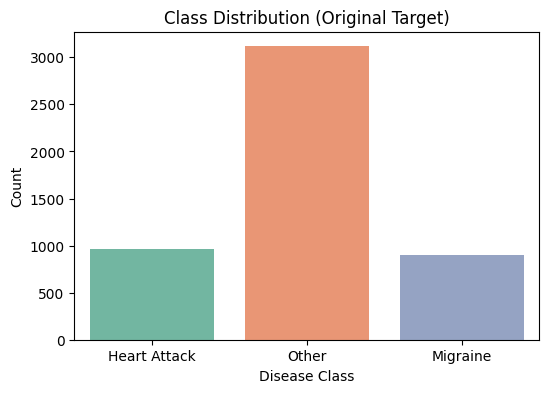

In [17]:
plt.figure(figsize=(6, 4))
sns.countplot(x="prognosis_3class", data=df, hue="prognosis_3class", palette="Set2", legend=False)
plt.title("Class Distribution (Original Target)")
plt.xlabel("Disease Class")
plt.ylabel("Count")
plt.show()

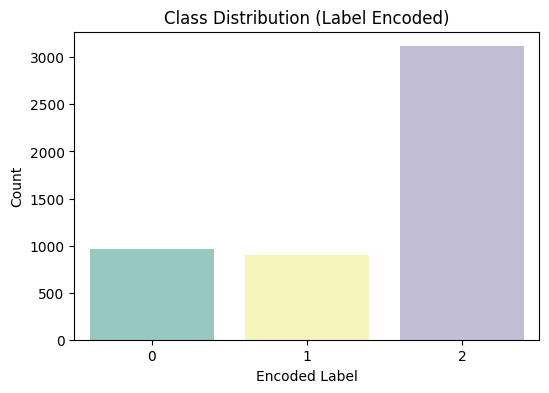

In [19]:
plt.figure(figsize=(6, 4))
sns.countplot(x="prognosis_encoded", data=df, hue="prognosis_encoded", palette="Set3", legend=False)
plt.title("Class Distribution (Label Encoded)")
plt.xlabel("Encoded Label")
plt.ylabel("Count")
plt.show()

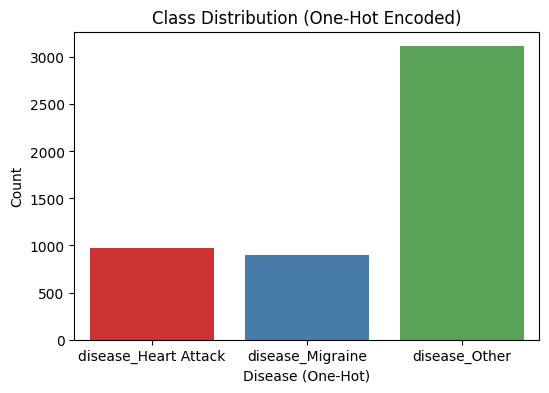

In [23]:
y_counts_df = y_counts.reset_index()
y_counts_df.columns = ["Disease", "Count"]
plt.figure(figsize=(6, 4))
sns.barplot(data=y_counts_df, x="Disease", y="Count", hue="Disease", palette="Set1", legend=False)
plt.title("Class Distribution (One-Hot Encoded)")
plt.ylabel("Count")
plt.xlabel("Disease (One-Hot)")
plt.show()